In [27]:
!pip install flax


   ---------------------------------------- 0.0/731.3 kB ? eta -:--:--
   --------- ------------------------------ 174.1/731.3 kB 5.1 MB/s eta 0:00:01
   ---------------------------- ----------- 522.2/731.3 kB 8.1 MB/s eta 0:00:01
   ---------------------------------------  727.0/731.3 kB 7.6 MB/s eta 0:00:01
   ---------------------------------------- 731.3/731.3 kB 5.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/240.7 kB ? eta -:--:--
   ---------------------------------------  235.5/240.7 kB ? eta -:--:--
   ---------------------------------------- 240.7/240.7 kB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/75.3 kB ? eta -:--:--
   -------------------------------------- - 71.7/75.3 kB ? eta -:--:--
   ---------------------------------------- 75.3/75.3 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/223.7 kB ? eta -:--:--
   ---------------------------------------- 223.7/223.7 kB 6.7 MB/s eta 0:00:00
   ------------

In [36]:
!pip install tensorflow


In [1]:
#import librarie
import numpy as np
import tensorflow as tf
from tensorflow import keras #used to load mnist data
from matplotlib import pyplot as plt
import seaborn as sn



In [2]:
# train data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [8]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
#scaling to get number between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

5


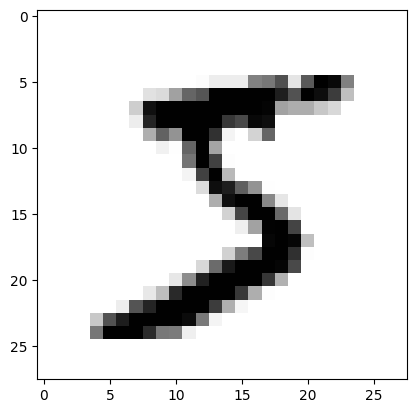

In [9]:
# at index 0 we have the number 5
index = 0

plt.imshow(x_train[index], cmap = plt.cm.binary)
print(y_train[index])

In [11]:
# train model
x_train_flat = x_train.reshape(len(x_train), (28*28))
x_test_flat = x_test.reshape(len(x_test), (28*28))

x_train_flat.shape

(60000, 784)

In [14]:
# 4layers to train one each using different activation function
model = keras.Sequential( [
    keras.layers.Dense(128, input_shape=(784,), activation='relu'),
    keras.layers.Dense(64, activation='sigmoid'),
    keras.layers.Dense(32, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax'),
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_flat, y_train, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7856 - loss: 0.9054
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9619 - loss: 0.1388
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9758 - loss: 0.0847
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9829 - loss: 0.0595
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9872 - loss: 0.0452


In [15]:
#try with our test data
model.evaluate(x_test_flat, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9735 - loss: 0.0962


[0.08219148963689804, 0.9769999980926514]

In [17]:
#confusion matrix: create variables to store model's prediction
y_pred = model.predict(x_test_flat)
y_pred_labels = [np.argmax(i) for i in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [21]:
# now create confusion matrix
'''
PRODUCE ERROR
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions= y_pred_labels)
sn.heatmap(confusion_matrix, annot=True, fmt ='d')
'''
# Now create confusion matrix
conf_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


TypeError: 'list' object is not callable